In [1]:
%matplotlib notebook
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font',size=16)
import numpy as np
import warnings
import csv
from collections import OrderedDict


from hyperfet.devices import SCMOSFET
from hyperfet.references import si

from functools import reduce
from operator import add
from scipy.optimize import curve_fit

In [27]:
VDD=.5
W=66e-9
pp=np.array([  0.566499  ,   4.8273191 ,   0.06284449,   2.90283919,
         1.70964589,   0.14734251,   0.01744025, -13.81898084])

pp[0]-=.24

<IPython.core.display.Javascript object>


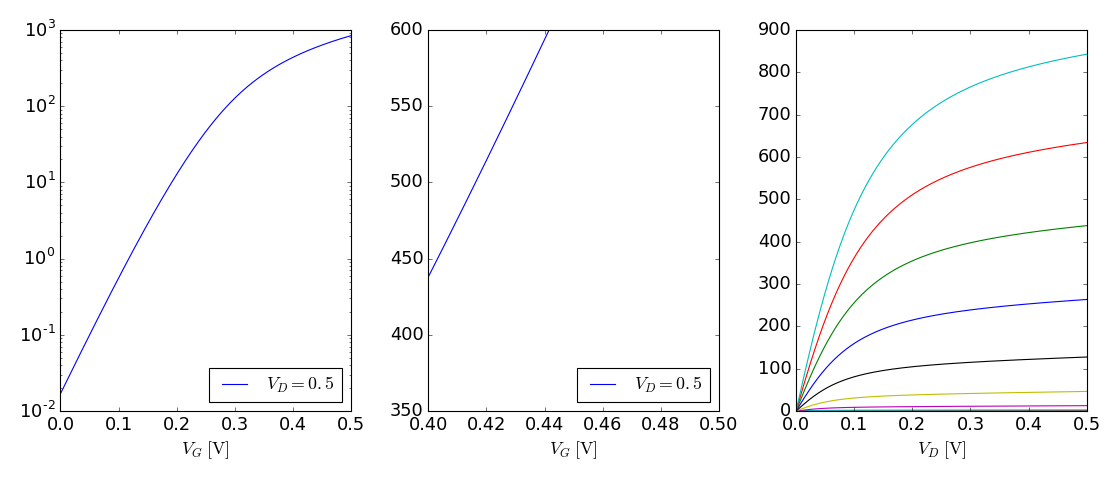

0.326499 4.8273191 0.06284449 2.90283919 1.70964589 0.14734251 0.01744025 -13.81898084


In [28]:
fet_by_fit=None
def show_fitted_HEMT(VT0,Cinv_vxo,SS,alpha,beta,VDsats,delta,log10Gleak):
    global fet_by_fit
    plt.figure(figsize=(14,6))
    print(VT0,Cinv_vxo,SS,alpha,beta,VDsats,delta,log10Gleak)
    fet=SCMOSFET(
        W=W,Cinv_vxo=Cinv_vxo*1000,
        VT0=VT0,alpha=alpha,SS=SS,delta=delta,
        VDsats=VDsats,beta=beta,Gleak=10**log10Gleak)
    
    plt.subplot(131)
    VD=np.array(VDD)
    VG=np.linspace(0,VDD,500)
    I=fet.ID(VD=VD,VG=VG)
    plt.plot(VG,I/fet.W,label=r"$V_D={:.2g}$".format(VDD))
    plt.yscale('log')
    plt.xlabel(r"$V_G\;\mathrm{[V]}$")
    #plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")
    plt.legend(loc='lower right',fontsize=16)
    
    plt.subplot(132)
    I=fet.ID(VD=VD,VG=VG)
    plt.plot(VG,I/fet.W,label=r"$V_D={:.2g}$".format(VDD))
    plt.xlabel(r"$V_G\;\mathrm{[V]}$")
    #plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")
    plt.legend(loc='lower right',fontsize=16)
    plt.xlim(.4,.5)
    plt.ylim(350,600)
    
    plt.subplot(133)
    VD=np.linspace(0,VDD,500)
    VG=np.linspace(0,VDD,11)
    I=fet.ID(VD=VD,VG=VG)
    plt.plot(VD,I.T/fet.W)
    plt.xlabel(r"$V_D\;\mathrm{[V]}$")
    plt.ylim(0)
    #plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")
    #plt.legend([r"$V_G={:.2g}$".format(vg) for vg in VG],loc='lower right',fontsize=16)
    
    plt.tight_layout()
    fet_by_fit=fet
show_fitted_HEMT(*pp)